## Hedging Pressure

In [46]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, date
import matplotlib.pyplot as plt

In [2]:
import quandl
quandl.ApiConfig.api_key = 'YOUR API KEY'
quandl.ApiConfig.verify_ssl = False

In [9]:
crb = ['C-', 'DA', 'CT', 'KC', 'GC', '8G', 'CB', 'ES', 'FC', 'LC', 'CC', 'SB', 'FV', 'TU', 'TY', 'KW', 'S-', 'SM', 'HG', 'PL', 'LW', 'UG', 'SI', 'NM', 'PA', 'RB', 'Y1', 'BO'\
    , 'NQ', 'LH', 'NX', 'NG', 'TM', 'Y2', 'RSV']

prod = ['CORN', 'CLASS III MILK', 'COTTON NO.2', 'COFFEE "C"', 'GOLD 100 OZ', 'Iron Ore, 62% FE CFR China (TSI)', 'BRENT CRUDE', 'S&P500 EMINI', 'CATTLE FEEDER', 'LIVE CATTLE'\
    , 'COCOA', 'SUGAR #11 (WORLD)', 'US 5YR NOTE', 'US 2YR NOTE', 'US 10YR NOTE', 'WHEAT (KCB)', 'SOYBEAN', 'SOYBEAN MEAL', 'COPPER', 'PLATINUM', 'WHITE SUGAR (LIF)', 'US ULTRA BOND'\
    , 'SILVER', 'ICE Dutch TTF Gas', 'PALLADIUM', 'GASOLINE RBOB', 'mini MSCI Emg Mkt', 'SOYBEAN OIL', 'NASDAQ 100 EMINI', 'LEAN HOGS', 'NIKKEI 225 (SGX)', 'NATURAL GAS'\
    ,'Ultra 10-Year Treasury Note', 'mini MSCI EAFE', 'E-Mini Russell 1000 Value IDX']

asset_class = ['Commodity', 'Commodity', 'Commodity', 'Commodity', 'Commodity', 'Commodity', 'Commodity', 'Equity', 'Commodity', 'Commodity', 'Commodity', 'Commodity'\
    , 'Bond', 'Bond', 'Bond', 'Commodity', 'Commodity', 'Commodity', 'Commodity', 'Commodity', 'Commodity', 'Bond', 'Commodity', 'Commodity', 'Commodity', 'Commodity', 'Equity'\
    , 'Commodity', 'Equity', 'Commodity', 'Equity', 'Commodity', 'Bond', 'Equity', 'Equity']

quandl_code = ['002602', '052641', '033661', '083731', '088606', '195651', '06765T', '13874A', '061641', '057642', '073732', '080732', '044601', '042601', '043602', '001611'\
    , '005602', '026603', '085691', '076651', '080735', '020604', '084691', '023B98', '075651', '111659', '244742', '007601', '209742', '054642', '240741', '023651', '043607'\
    , '244741', '23977C']

prod_df = pd.DataFrame({'Crb':crb, 'Name':prod, 'Asset_Class':asset_class, 'Code':quandl_code})
prod_df

,Crb,Name,Asset_Class,Code
0,C-,CORN,Commodity,002602
1,DA,CLASS III MILK,Commodity,052641
2,CT,COTTON NO.2,Commodity,033661
3,KC,"COFFEE ""C""",Commodity,083731
4,GC,GOLD 100 OZ,Commodity,088606
5,8G,"Iron Ore, 62% FE CFR China (TSI)",Commodity,195651
6,CB,BRENT CRUDE,Commodity,06765T
7,ES,S&P500 EMINI,Equity,13874A
8,FC,CATTLE FEEDER,Commodity,061641
9,LC,LIVE CATTLE,Commodity,057642


In [10]:
data = {}
for i in range(len(prod_df)):
    data[prod_df['Name'].iloc[i]] = quandl.get('CFTC/{}_F_L_ALL'.format(prod_df['Code'].iloc[i]))

c:\Users\TMF Jagon Chou\anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'data.nasdaq.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
c:\Users\TMF Jagon Chou\anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'data.nasdaq.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
c:\Users\TMF Jagon Chou\anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'data.nasdaq.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
c:\Users\TMF Jagon Chou\anacond

In [11]:
for i in prod:
    data[i]['Net_Long'] = data[i]['Commercial Long'] - data[i]['Commercial Short']
    data[i]['Hedging_Pressure_Variable'] = (data[i]['Commercial Long'] - data[i]['Commercial Short']) / (data[i]['Commercial Long'] + data[i]['Commercial Short'])

In [12]:
for i in prod:
    position = ['NA']
    for j in range(1, len(data[i])):
        if data[i]['Net_Long'].iloc[j-1] < 0:
            position.append('-1')
        elif data[i]['Net_Long'].iloc[j-1] > 0:
            position.append('1')
        else:
            position.append('0')
    data[i]['Position'] = position
    data[i] = data[i][['Commercial Long', 'Commercial Short', 'Net_Long', 'Hedging_Pressure_Variable', 'Position']]

"""
for i in prod:
    position = ['NA']
    for j in range(1, len(data[i])):
        if data[i]['Net_Long'].iloc[j-1] < 0:
            position.append('-1')
        elif data[i]['Net_Long'].iloc[j-1] > 0:
            position.append('1')
        else:
            position.append('0')
    data[i]['Position'] = position
"""

"\nfor i in prod:\n    position = ['NA']\n    for j in range(1, len(data[i])):\n        if data[i]['Net_Long'].iloc[j-1] < 0:\n            position.append('-1')\n        elif data[i]['Net_Long'].iloc[j-1] > 0:\n            position.append('1')\n        else:\n            position.append('0')\n    data[i]['Position'] = position\n"

In [13]:
data

{'CORN':             Commercial Long  Commercial Short  Net_Long  \
 Date                                                      
 1986-01-15         307790.0          307815.0     -25.0   
 1986-01-31         323200.0          247390.0   75810.0   
 1986-02-14         303885.0          205150.0   98735.0   
 1986-02-28         288625.0          204725.0   83900.0   
 1986-03-14         276865.0          220480.0   56385.0   
 ...                     ...               ...       ...   
 2022-12-06         597177.0          754713.0 -157536.0   
 2022-12-13         570199.0          743422.0 -173223.0   
 2022-12-20         557960.0          716576.0 -158616.0   
 2022-12-27         545317.0          735190.0 -189873.0   
 2023-01-03         541890.0          759007.0 -217117.0   
 
             Hedging_Pressure_Variable Position  
 Date                                            
 1986-01-15                  -0.000041       NA  
 1986-01-31                   0.132862       -1  
 1986-02-1

In [7]:
crb_dt = pd.read_csv('crb.csv')
crb_dt['Date'] = pd.to_datetime(crb_dt['Date'])
dt_col = crb_dt.columns
dt_col

Index(['Date', 'HN', 'AZ', 'MH', 'BO', 'IE', 'IA', 'C-', 'CG', 'CL', 'CT',
       'DA', 'BF', 'GM', 'GH', 'GX', 'ES', 'X-', 'FC', 'MX', 'DF', 'R-', 'IL',
       'FV', 'GC', 'HH', 'HG', 'HS', 'HO', 'BT', 'NX', 'KC', 'KS', 'KM', 'KB',
       'KW', 'LC', 'CB', 'CC', 'LF', 'LH', 'IX', 'NG', 'NQ', 'OX', 'PL', 'RB',
       'WC', 'RSG', 'RSV', 'S-', 'SB', 'SI', 'NH', 'SM', 'SZ', 'SV', 'SUS',
       'FX', 'TP', 'TU', 'TQ', 'TY', 'UG', 'US', 'W-', 'PI', 'TS', 'YS'],
      dtype='object')

### Strategy: Signal Trading

Use signal day's closing price as the initial price to enter long or short position, and hold it till one day before the next signal day. The reason is that as long as we gain the info of the commercial long or short, we can determine which direction we would like to enter. However, we should close the position before the next signal day as we will then use the next signal to generate our prediction and decide the position.

The result will include both cumulative returns as well as the PnL of each trades.

In [8]:
dt_strats = data.copy()

In [9]:
for i in list(dt_strats.keys()):
    if prod_df[prod_df['Name'] == i]['Crb'].values[0] not in dt_col:
        del dt_strats[i]
        continue
    dt_strats[i] = pd.merge(dt_strats[i], crb_dt[['Date', prod_df[prod_df['Name'] == i]['Crb'].values[0]]], how='left', left_index=True, right_on='Date').reset_index(drop=True)
    dt_strats[i].dropna(inplace=True)
    dt_strats[i].reset_index(inplace=True, drop=True)
    
    dt_strats = {k:v for (k,v) in dt_strats.items() if not v.empty}  # remove empty dataframe


In [10]:
for i in list(dt_strats.keys()):
    if prod_df[prod_df['Name'] == i]['Crb'].values[0] not in dt_col or i not in dt_strats.keys():
        continue
    cum_pnl = 0
    cum_pnl_list = []
    trade_return_list = []
    crb_ = prod_df[prod_df['Name'] == i]['Crb'].values[0]
    remain_pos = 0
    
    for j in range(len(dt_strats[i])):

        if remain_pos == 1:
            #closing_date = crb_dt['crb_'][crb_dt.index[crb_dt['Date'] == dt_strats[i]['Date'][j]]]
            price = float(crb_dt[crb_][crb_dt.index[crb_dt['Date'] == dt_strats[i]['Date'][j]] - 1])
            cum_pnl += price
            trade_return = (price - ini_) / ini_
            trade_return_list.append(trade_return)
            remain_pos = 0
        
        elif remain_pos == -1:
            #closing_date = dt_strats[i]['Date'][j] - timedelta(days=1)
            price = float(crb_dt[crb_][crb_dt.index[crb_dt['Date'] == dt_strats[i]['Date'][j]] - 1])
            cum_pnl -= price
            trade_return = (ini_ - price) / price
            trade_return_list.append(trade_return)
            remain_pos = 0

        if j == len(dt_strats[i]) - 1:
            break

        # Long Position
        if dt_strats[i]['Position'][j] == '1':
            price = float(dt_strats[i][crb_][j])
            cum_pnl -= price  # buy
            cum_pnl_list.append(cum_pnl)
            remain_pos = 1  # record for later closing
            ini_ = price
        
        # Short Position
        elif dt_strats[i]['Position'][j] == '-1':
            price = float(dt_strats[i][crb_][j])
            cum_pnl += price  # sell
            cum_pnl_list.append(cum_pnl)
            remain_pos = -1  # record for later closing
            ini_ = price
    
    trade_return_list.append(0)
    cum_pnl_list.append(cum_pnl)

    dt_strats[i]['Cum_PnL'] = cum_pnl_list
    dt_strats[i]['Return'] = trade_return_list

### 28 Futures

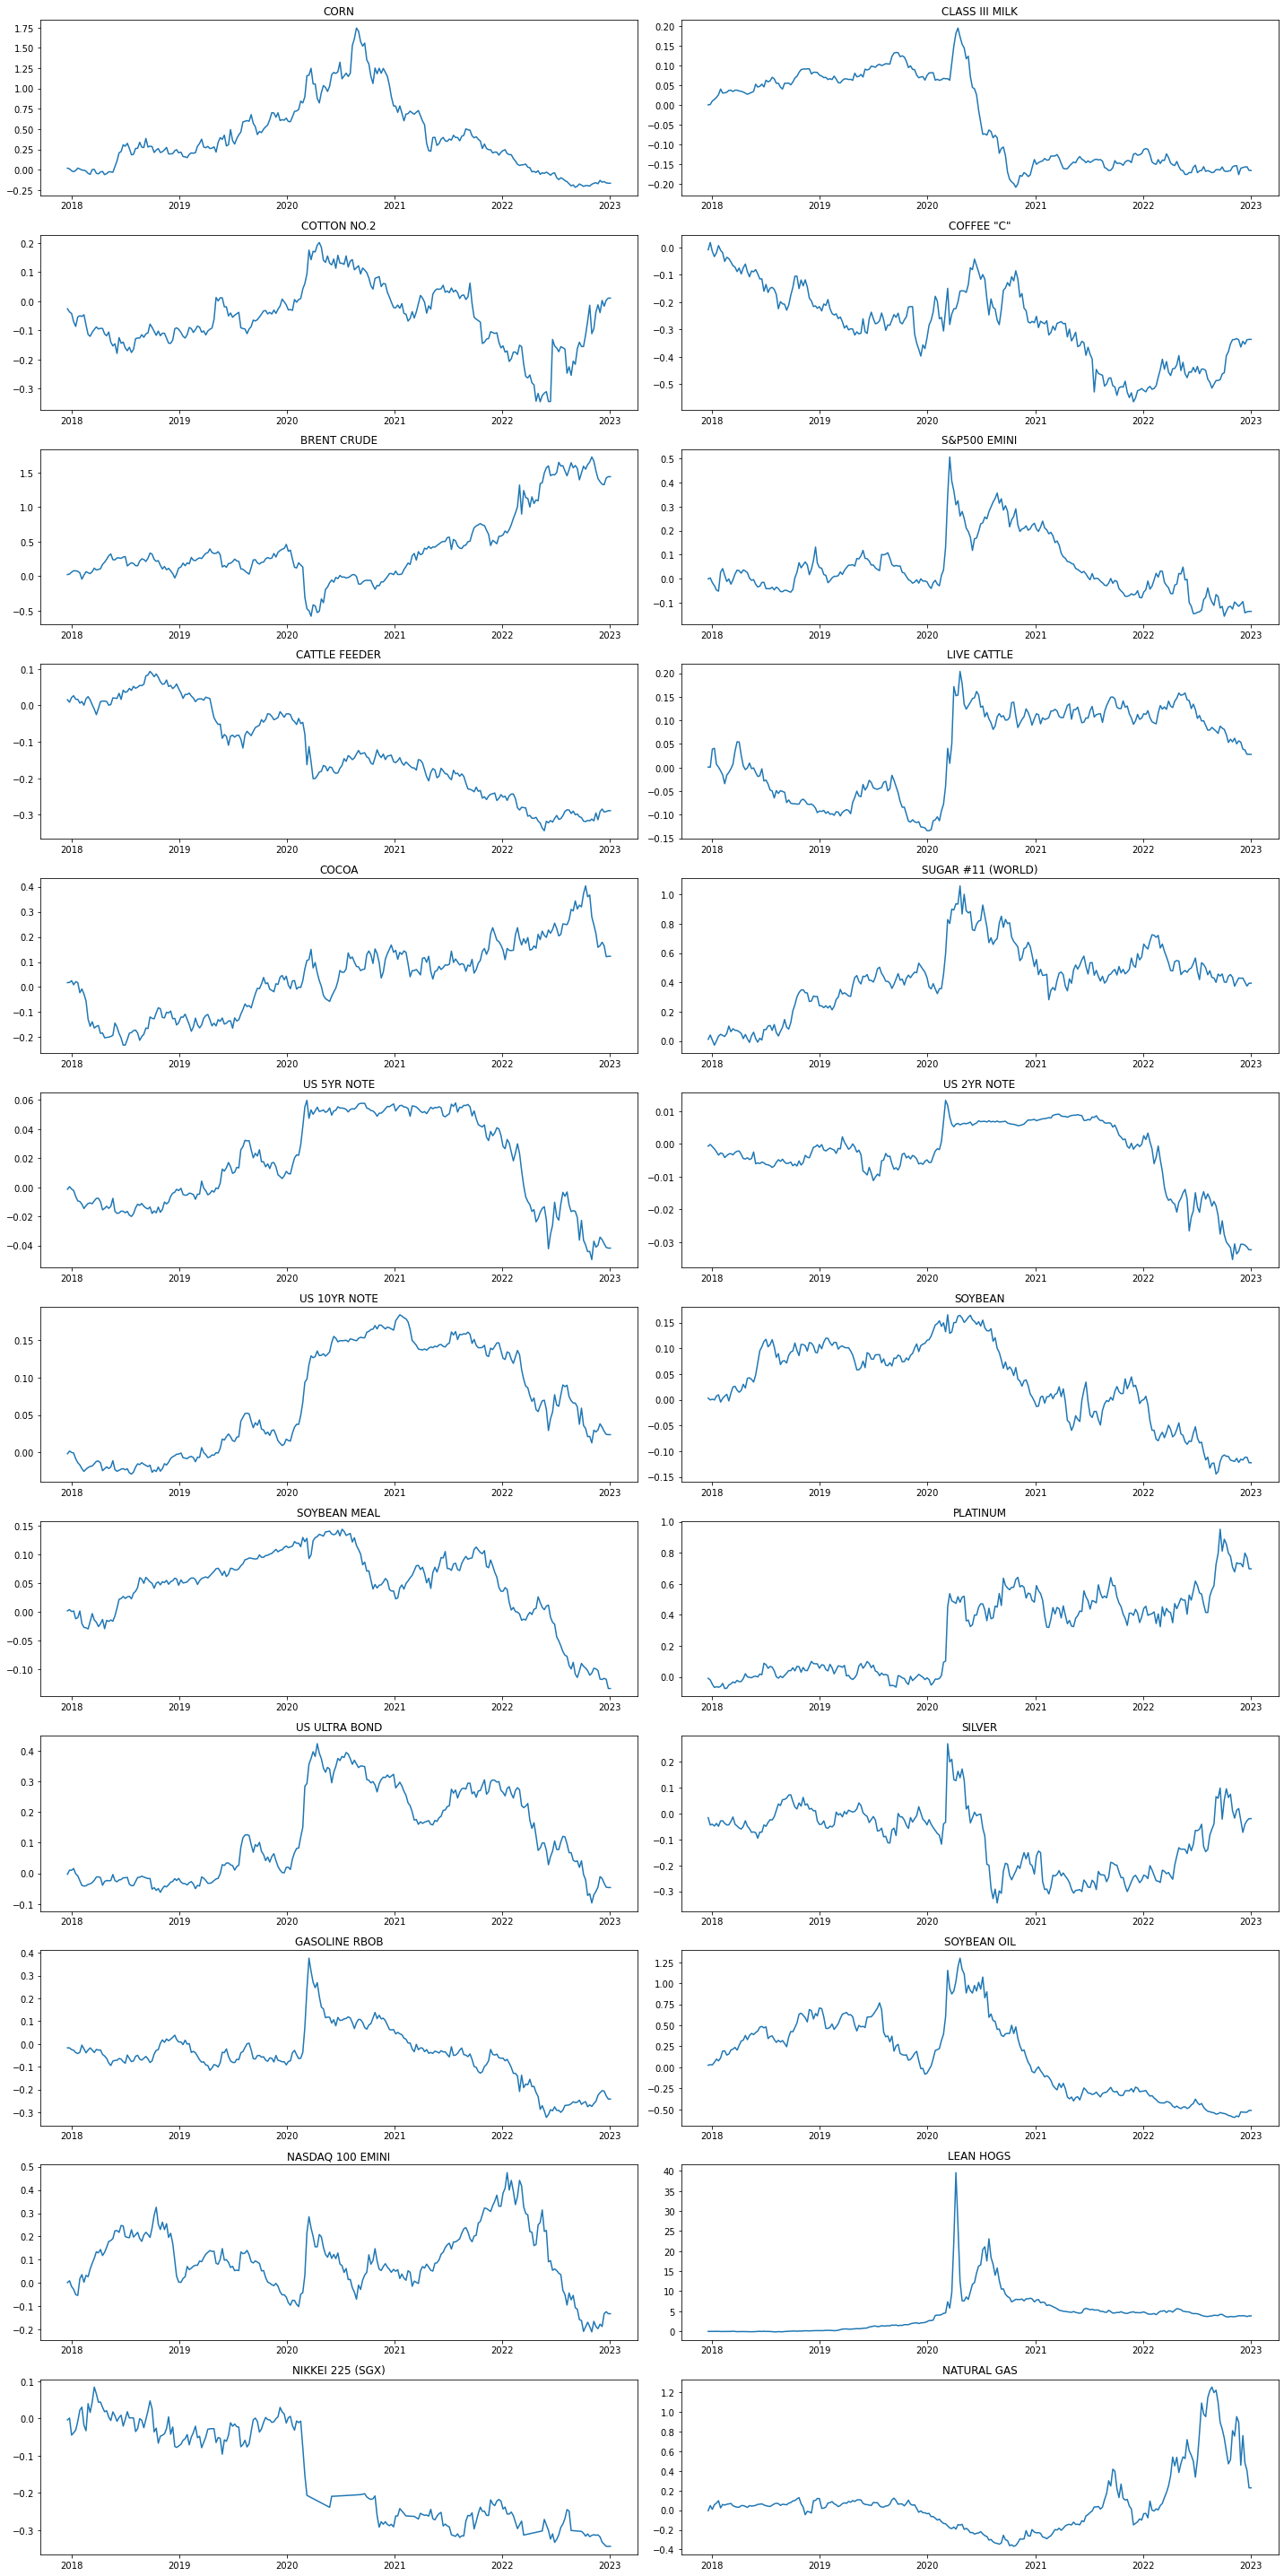

In [11]:
fig, axs = plt.subplots(12,2, figsize=(20, 40), facecolor='w', edgecolor='k')
axs = axs.ravel()
k = 0
for i in list(dt_strats.keys()):
    #if prod_df[prod_df['Name'] == i]['Crb'].values[0] not in dt_col or i not in dt_strats.keys():
    #    continue
    
    axs[k].plot(dt_strats[i]['Date'], (dt_strats[i]['Return'] + 1).cumprod() - 1)
    axs[k].set_title(i)
    k+=1

plt.tight_layout()
plt.savefig('Commodities Futures Performance.png', dpi=300)
plt.show();

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
corr_df = pd.DataFrame()
for i in list(dt_strats.keys()):
    corr_df[i] = dt_strats[i]['Return']

corr_df.corr()

,CORN,CLASS III MILK,COTTON NO.2,"COFFEE ""C""",BRENT CRUDE,S&P500 EMINI,CATTLE FEEDER,LIVE CATTLE,COCOA,SUGAR #11 (WORLD),...,SOYBEAN MEAL,PLATINUM,US ULTRA BOND,SILVER,GASOLINE RBOB,SOYBEAN OIL,NASDAQ 100 EMINI,LEAN HOGS,NIKKEI 225 (SGX),NATURAL GAS
CORN,1.000000,-0.037175,0.163624,0.025523,-0.125399,0.131852,0.138698,-0.061945,0.005323,0.135022,...,0.309385,0.178272,0.070720,0.108583,0.119599,0.157385,0.078504,0.047277,-0.080068,-0.087177
CLASS III MILK,-0.037175,1.000000,-0.039997,0.006130,-0.039128,-0.007039,-0.113951,0.138216,-0.096213,-0.006872,...,0.096647,0.008015,0.111110,0.002090,-0.004329,-0.012637,-0.122692,0.217119,0.177195,0.011258
COTTON NO.2,0.163624,-0.039997,1.000000,0.109217,-0.096737,0.128901,0.018132,0.067555,0.055006,0.171087,...,0.038467,0.167044,0.113441,0.107196,0.156963,0.124209,0.065524,0.013525,-0.161757,-0.102483
"COFFEE ""C""",0.025523,0.006130,0.109217,1.000000,-0.167274,0.088175,-0.274768,0.203449,0.098987,0.280727,...,0.017438,0.062146,0.020698,0.091730,0.097391,0.214400,0.112667,0.075798,0.071313,0.008398
BRENT CRUDE,-0.125399,-0.039128,-0.096737,-0.167274,1.000000,-0.344854,0.072971,-0.025905,-0.171005,-0.348237,...,0.069339,-0.282703,-0.319862,-0.229077,-0.739535,-0.271846,-0.263298,0.073532,0.189352,0.120102
S&P500 EMINI,0.131852,-0.007039,0.128901,0.088175,-0.344854,1.000000,-0.132433,0.113966,0.114662,0.191327,...,-0.027078,0.257082,0.345828,0.165109,0.473875,0.178477,0.400595,-0.001965,-0.264747,-0.040503
CATTLE FEEDER,0.138698,-0.113951,0.018132,-0.274768,0.072971,-0.132433,1.000000,-0.656247,-0.096830,-0.079632,...,-0.045866,-0.126970,-0.147956,-0.150165,-0.102253,-0.145782,-0.186016,-0.300156,0.025586,0.024476
LIVE CATTLE,-0.061945,0.138216,0.067555,0.203449,-0.025905,0.113966,-0.656247,1.000000,-0.034960,0.150703,...,0.142277,0.150488,0.217653,0.138129,0.105616,0.226677,0.219476,0.392401,-0.110483,-0.018057
COCOA,0.005323,-0.096213,0.055006,0.098987,-0.171005,0.114662,-0.096830,-0.034960,1.000000,0.088565,...,-0.023280,0.119282,0.107098,0.156772,0.181271,0.019240,0.033425,0.043851,-0.016691,-0.142297
SUGAR #11 (WORLD),0.135022,-0.006872,0.171087,0.280727,-0.348237,0.191327,-0.079632,0.150703,0.088565,1.000000,...,0.109749,0.269200,0.140775,0.245364,0.263412,0.268314,0.152273,0.078203,-0.048154,-0.083064


/var/folders/r_/_tmcm1b94196mgq9mr9yn6500000gn/T/ipykernel_4264/2201497179.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr_df.corr(), dtype=np.bool))


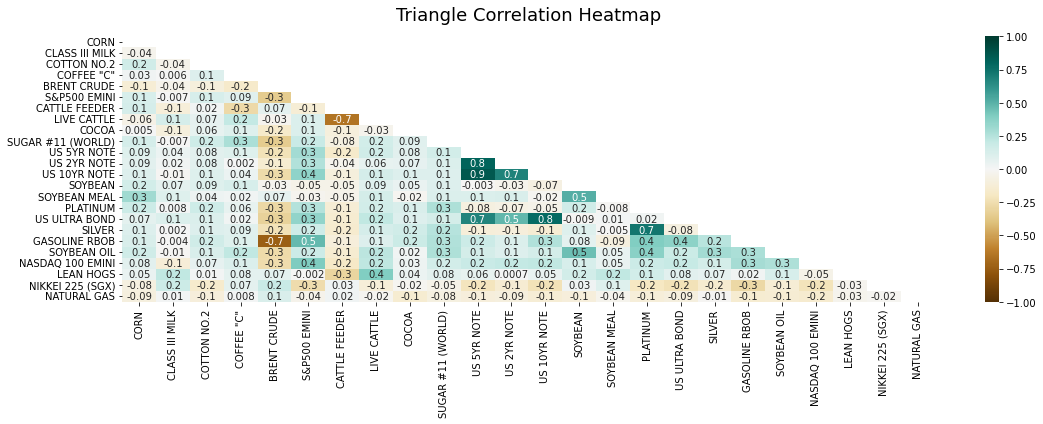

In [14]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(corr_df.corr(), dtype=np.bool))
heatmap = sns.heatmap(corr_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG', fmt='.1g')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
plt.tight_layout()
plt.savefig('Triangle Correlation Heatmap.png', dpi=300);

## Observation

I would like to divide all the futures into three catagories to dicuss their past performance.

- Bond Market
    * US 5YR NOTE, US 2YR NOTE, US 10YR NOTE, and US Ultra Bond suffer from the FED's hawkish monetary policies, especially from the late 2021 throughout the whole 2022. They present a very high correlation between each other.
    * In the graph, we can also find the pattern of "Inverted Yield Curve" by speculating about 2YR and 5YR ones. Theoratically, 5YR Note should provide higher investment return than 2YR one because of the longer period and the effect of higher volatility (Yield curve expectations theory). However, the return of the 5YR note slumped below the cumulative return generated by the 2YR note, showing the market's concerns of the future's economy.  

                                                                     ----------

- Stock Market
    * S&P 500 EMINI, NASDAQ 100 EMINI, and NIKKEI 225 are stock indices futures, each of them track the performance of the market index. Despite the fact that the overall market condition is not good, there are some difference among varioud market indices in terms of the number of companies they track, their weights as well as sector allocation, which then results in a difference in the performance of the different patterns we find in this report of futures products.
    * For S&P 500 EMINI, because the S&P 500 index is made up of stocks of the 500 biggest listed US companies, which represent more than 80% of the total market capitalization of the companies listed on the US stock exchange, it can be considered a broad indicator of the US equity markets. On top of that, its weighting is based on market cap, so the higher the market cap, the larger the influence on the index's performance. But compared to NASDAQ, the tech sector is a much less focus, only account for less than 30%. And because it consist of more stocks, it can better reflect the overall US market condition. There was a downward sloping trend from COVID-19 outbreak, and even fueled by the energy crisis and inflation concerns.
    * Different from S&P 500, NASDAQ focuses on tech stocks. That's the reason why we can find a soaring trend in 2021 and a large slump in 2022. It reflects what happened to the biggest tech companies as they benefited from the digitalization and higher IT spending during the pandemic. However, the energy crisis and China lockdown further impacted on the supply chain in 2022, plus the fear of recession and hawkish position by central banks, all dragging the tech sector's performance. As a result, made NASDAQ slump in 2022.
    * NIKKEI had a severe slump in 2020, and after that it continues its low performance. The reason may be that Japan is one of the first-affected countries from the COVID outbreak, and at that time there's no vaccines and the Asian countries and markets were all hit by the pandemic. 

                                                                     ----------

- Commodity
    * There are four different path for commodities.
    * For Corn, Milk, Live Cattle, Soybean, Soybean Meal, Soybean Oil, Suger, Gasoline RBOB, and Lean Hogs, they had a peak in 2020 and then slumped. The reason for this kind of pattern is that with the COVID outbreak and supply chain issue, the price of food went up. But later the USD soared because of the interest rate hikes, suppressing the price of some food.
    * For Cotton, Coffee "C", Silver, they also had a peak in the past, then declined, but recently goes up again. A reduction in cultivation areas to unseasonal rainfall and extended monsoon, coupled with the farmers' reluctance to grow the crop, play a large role in the high price of cotton. For Coffee "C", it is the world benchmark for Arabica coffee. The reason for its decline includes  weather in Brazil is better than it has been the past couple of years. Rainfall this fall suggests that the country will have a good coffee crop, securing supply. But its price then jumped as food inflation hits new high. As for the metal, the strong USD made Silver lower, but recent inflation fears make silver goes up once again.
    * For Cattle Feeder, its past trend was continuing declining. This is because of the increase in the corn prices as well as packers have an ample supply of cattle to hang on the rail.
    * For Brent Oil, Cocoa, Platinum, and Natural Gas, they had a upward trend from the past few years. Brent Oil and Natural Gas are energy, both greatly affected by the COVID, the energy crisis, ect. Making the energy price continue climbing up. Platinum acts as the similar role as gold, its value increased when the outlook of the economy is not quite well. As for Cocoa, its return increased sharply in 2022, resulting from the higher food price, supply chain issue, and a severe drought in West Africa.

## Further Application for the Signal Strategy

In [15]:
sharpe_df = pd.DataFrame({'Contract': list(dt_strats.keys())})
sharpe_list = []

for i in list(dt_strats.keys()):
    sharpe_ratio = (dt_strats[i]['Return']).mean() / (dt_strats[i]['Return']).std()
    period_SR = round(sharpe_ratio * (len(dt_strats[i]) ** 0.5), 2)  # like annualized but we have 264 days
    sharpe_list.append(period_SR)

sharpe_df['Sharpe_Ratio'] = sharpe_list
sharpe_df = sharpe_df.set_index('Contract').sort_values(by=['Sharpe_Ratio'], ascending=False)
sharpe_df

,Sharpe_Ratio
Contract,
LEAN HOGS,1.61
BRENT CRUDE,1.37
PLATINUM,1.14
SUGAR #11 (WORLD),0.89
NATURAL GAS,0.67
COCOA,0.49
SILVER,0.28
US 10YR NOTE,0.27
COTTON NO.2,0.27
